<a href="https://colab.research.google.com/github/vivekbiragoni/Deep_Learning/blob/main/ffn_increase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
""" Demonstrates the easy of integration of a custom layer """
import math
import torch
import torch.nn as nn
import numpy as np

In [23]:
class MyLinearLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super(MyLinearLayer, self).__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        w_times_x = torch.mm(x, self.weights.t())
        return torch.add(w_times_x, self.bias)  # w times x + b

In [24]:
import pandas as pd

# Provide the file path
file_path = "/content/drive/MyDrive/data/booking.csv"

# Read the CSV file into a Pandas DataFrame
booking_data = pd.read_csv(file_path)

# Display the contents of the DataFrame
booking_data.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [25]:
# Get the feature names (column names) from the DataFrame
feature_names = booking_data.columns.tolist()

# Display the feature names
print("Feature Names:", feature_names)

Feature Names: ['Booking_ID', 'number of adults', 'number of children', 'number of weekend nights', 'number of week nights', 'type of meal', 'car parking space', 'room type', 'lead time', 'market segment type', 'repeated', 'P-C', 'P-not-C', 'average price', 'special requests', 'date of reservation', 'booking status']


In [26]:
# Specify the columns you want to drop
columns_to_drop = ['Booking_ID', 'type of meal', 'room type', "date of reservation"]

# Use the drop method to remove the specified columns
booking_data.drop(columns=columns_to_drop, inplace=True)
booking_data.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,0,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,0,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,0,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,0,48,Online,0,0,0,77.00,0,Canceled


In [27]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the "Market Segment Type" column
booking_data['market segment type'] = label_encoder.fit_transform(booking_data['market segment type'])
booking_data['booking status'] = label_encoder.fit_transform(booking_data['booking status'])
booking_data.head()


,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,0,224,3,0,0,0,88.00,0,1
1,1,0,1,3,0,5,4,0,0,0,106.68,1,1
2,2,1,1,3,0,1,4,0,0,0,50.00,0,0
3,1,0,0,2,0,211,4,0,0,0,100.00,1,0
4,1,0,1,2,0,48,4,0,0,0,77.00,0,0


In [28]:
X = booking_data.drop(['booking status'], axis=1)
y = booking_data['booking status']

In [29]:
X.head()

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests
0,1,1,2,5,0,224,3,0,0,0,88.00,0
1,1,0,1,3,0,5,4,0,0,0,106.68,1
2,2,1,1,3,0,1,4,0,0,0,50.00,0
3,1,0,0,2,0,211,4,0,0,0,100.00,1
4,1,0,1,2,0,48,4,0,0,0,77.00,0


In [30]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: booking status, dtype: int64

In [31]:
y.shape

(36285,)

In [32]:
X.shape

(36285, 12)

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary set (80% train + validation, 20% test)
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation sets (75% train, 25% validation from the original dataset)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25, random_state=42)

# Display the shapes of the sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_validation.shape, y_validation.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (21771, 12) (21771,)
Validation set: (7257, 12) (7257,)
Test set: (7257, 12) (7257,)


In [34]:
import torch

# Convert X_train, X_validation, X_test to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_validation_tensor = torch.tensor(X_validation.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Convert y_train, y_validation, y_test to PyTorch tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_validation_tensor = torch.tensor(y_validation.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [35]:
# Check the present data type and device of X_train_tensor
print("Type:", type(X_train_tensor))
print("Data Type:", X_train_tensor.dtype)
print("Device:", X_train_tensor.device)


Type: <class 'torch.Tensor'>
Data Type: torch.float32
Device: cpu


In [36]:
import torch.nn as nn

class MyNeuralNetwork_increasing(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(MyNeuralNetwork_increasing, self).__init__()

        # Define the layers
        self.custom_fc1 = MyLinearLayer(input_size, hidden_units)
        self.relu = nn.ReLU()
        self.custom_fc2 = MyLinearLayer(hidden_units, hidden_units*2)
        self.custom_fc3 = MyLinearLayer(hidden_units*2, output_size)

    def forward(self, x):
        x = self.custom_fc1(x)
        x = self.relu(x)
        x = self.custom_fc2(x)
        x = self.relu(x)
        x = self.custom_fc3(x)
        return x


In [42]:
# Assuming X_train has the shape (num_samples, num_features)
model = MyNeuralNetwork_increasing(input_size=X_train.shape[1], hidden_units=X_train.shape[1]//2, output_size=2)

# Move the model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

# Assuming you have your data in PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)


criterion = nn.CrossEntropyLoss()  # For binary classification, use BCELoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Forward pass
output = model(X_train_tensor)

# # Print the output shape
print("Output Shape:", output.shape)
# print("Device:", X_train_tensor.device)

Output Shape: torch.Size([21771, 2])


In [38]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch.nn.functional as F

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Epoch [1/20000], Loss: 12.7657, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [2/20000], Loss: 12.4671, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [3/20000], Loss: 12.1706, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [4/20000], Loss: 11.8760, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [5/20000], Loss: 11.5833, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [6/20000], Loss: 11.2924, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [7/20000], Loss: 11.0033, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [8/20000], Loss: 10.7161, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [9/20000], Loss: 10.4306, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Epoch [10/20000], Loss: 10.1469, Accuracy: 0.3303, Precision: 0.0000, Recall: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Streaming output truncated to the last 5000 lines.
Epoch [15001/20000], Loss: 0.4086, Accuracy: 0.8101, Precision: 0.8391, Recall: 0.8864, F1 Score: 0.8621
Epoch [15002/20000], Loss: 0.4088, Accuracy: 0.8166, Precision: 0.8273, Recall: 0.9177, F1 Score: 0.8702
Epoch [15003/20000], Loss: 0.4090, Accuracy: 0.8100, Precision: 0.8397, Recall: 0.8852, F1 Score: 0.8619
Epoch [15004/20000], Loss: 0.4091, Accuracy: 0.8160, Precision: 0.8262, Recall: 0.9185, F1 Score: 0.8699
Epoch [15005/20000], Loss: 0.4091, Accuracy: 0.8100, Precision: 0.8391, Recall: 0.8862, F1 Score: 0.8620
Epoch [15006/20000], Loss: 0.4090, Accuracy: 0.8169, Precision: 0.8290, Recall: 0.9154, F1 Score: 0.8700
Epoch [15007/20000], Loss: 0.4087, Accuracy: 0.8098, Precision: 0.8371, Recall: 0.8891, F1 Score: 0.8623
Epoch [15008/20000], Loss: 0.4084, Accuracy: 0.8173, Precision: 0.8331, Recall: 0.9093, F1 Score: 0.8695
Epoch [15009/20000], Loss: 0.4082, Accuracy: 0.8178, Precision: 0.8358, Recall: 0.9060, F1 Score: 0.8695
Epoc

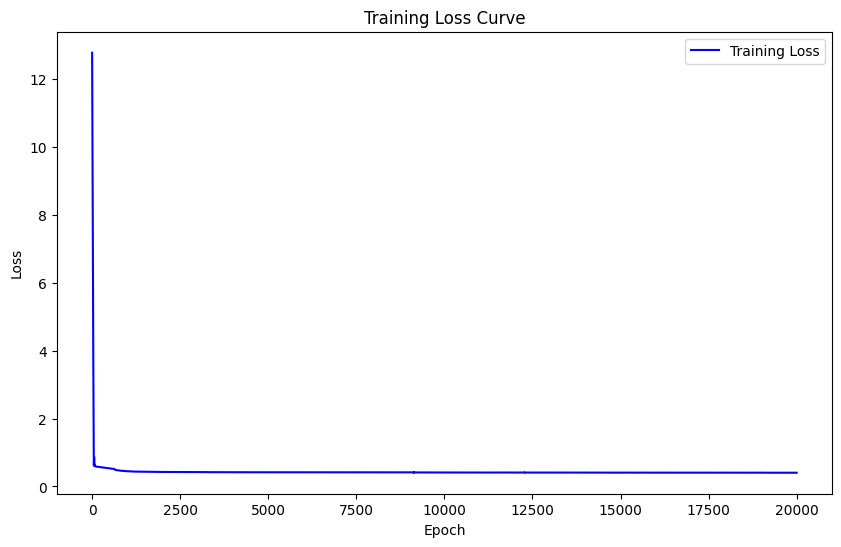

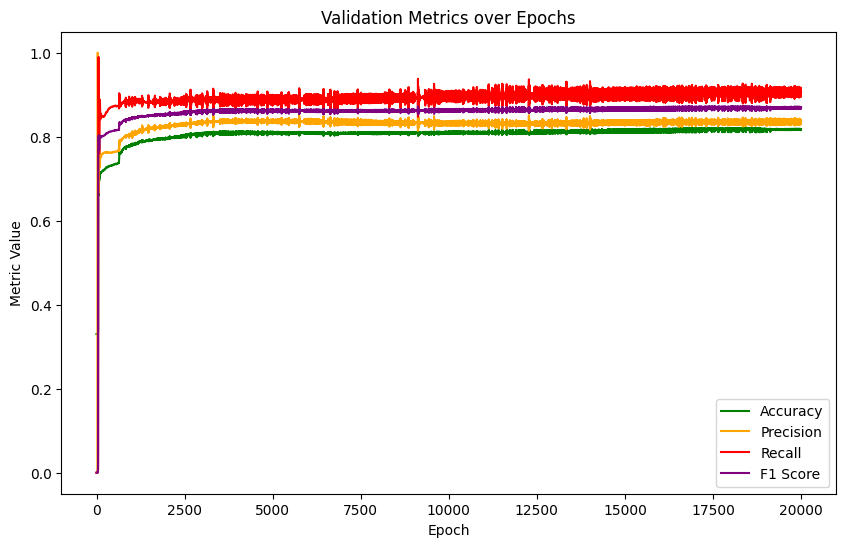

In [44]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_validation_tensor = X_validation_tensor.to(device)
y_validation_tensor = y_validation_tensor.to(device)

npum_epochs = 20000
train_losses = []
validation_losses = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for epoch in range(num_epochs):
    # Training
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor.long())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    with torch.no_grad():
        validation_outputs = model(X_validation_tensor)

    validation_probs = F.softmax(validation_outputs, dim=1)
    validation_preds = torch.argmax(validation_probs, dim=1)

    # Convert validation predictions and ground truth to numpy arrays
    validation_preds_np = validation_preds.cpu().numpy()
    y_validation_np = y_validation_tensor.cpu().numpy()

    # Calculate metrics
    accuracy = accuracy_score(y_validation_np, validation_preds_np)
    precision = precision_score(y_validation_np, validation_preds_np)
    recall = recall_score(y_validation_np, validation_preds_np)
    f1 = f1_score(y_validation_np, validation_preds_np)

    # Store validation metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Print metrics for monitoring training progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Plotting Training Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

# Plotting Validation Metrics
plt.figure(figsize=(10, 6))
plt.plot(accuracies, label='Accuracy', color='green')
plt.plot(precisions, label='Precision', color='orange')
plt.plot(recalls, label='Recall', color='red')
plt.plot(f1_scores, label='F1 Score', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Validation Metrics over Epochs')
plt.legend()
plt.show()


Final Accuracy: 0.8178
Final Precision: 0.8366
Final Recall: 0.9047
Final F1 Score: 0.8693


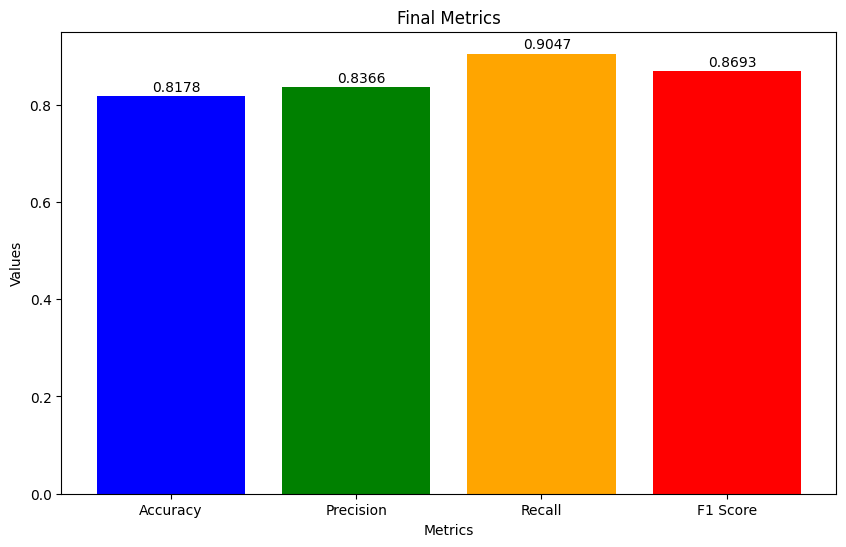

In [45]:

final_accuracy = accuracies[-1]
final_precision = precisions[-1]
final_recall = recalls[-1]
final_f1 = f1_scores[-1]

print(f'Final Accuracy: {final_accuracy:.4f}')
print(f'Final Precision: {final_precision:.4f}')
print(f'Final Recall: {final_recall:.4f}')
print(f'Final F1 Score: {final_f1:.4f}')


metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [final_accuracy, final_precision, final_recall, final_f1]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Final Metrics')

for bar, value in zip(bars, metrics_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.4f}', fontsize=10)

plt.show()

Test Loss: 0.4191
Test Accuracy: 0.8211
Test Precision: 0.8370
Test Recall: 0.9098
Test F1 Score: 0.8719


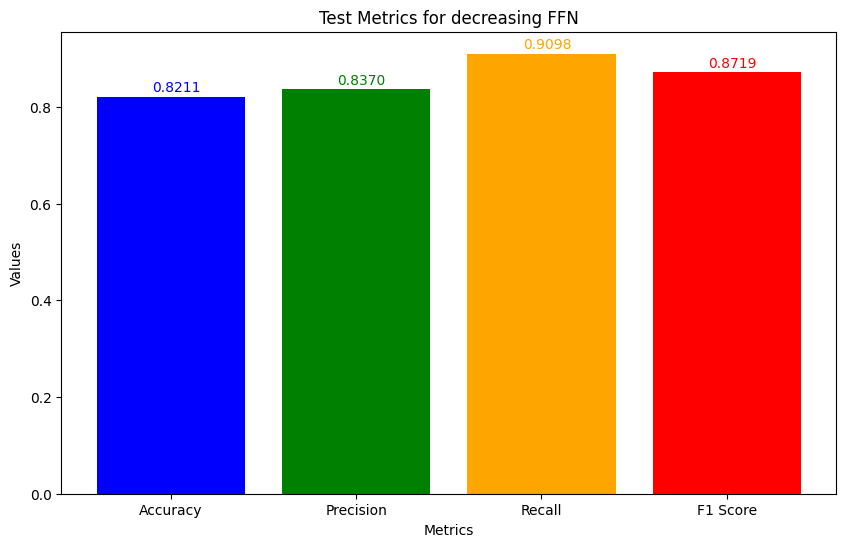

In [46]:

model.to(device)

X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model.eval()

with torch.no_grad():
    test_outputs = model(X_test_tensor)

test_loss = criterion(test_outputs, y_test_tensor.long())

test_probs = F.softmax(test_outputs, dim=1)

test_preds = torch.argmax(test_probs, dim=1)

test_preds_np = test_preds.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

test_accuracy = accuracy_score(y_test_np, test_preds_np)
test_precision = precision_score(y_test_np, test_preds_np)
test_recall = recall_score(y_test_np, test_preds_np)
test_f1 = f1_score(y_test_np, test_preds_np)

print(f'Test Loss: {test_loss.item():.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')
print(f'Test F1 Score: {test_f1:.4f}')

# Set the model back to training mode
model.train()

# Plotting the test metrics with colorized bars and values on top
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [test_accuracy, test_precision, test_recall, test_f1]

# Assign colors to bars
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics_names, metrics_values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Test Metrics for decreasing FFN')

# Adding values on top of bars with colorized text
for bar, value, color in zip(bars, metrics_values, colors):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{value:.4f}', fontsize=10, color=color)

plt.show()